Question # 3

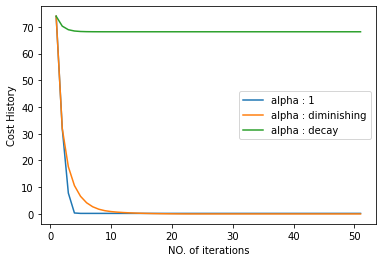

In [1]:
import numpy as np
## Enter code for part (a) below [2 marks]
#booth function
def booth(arr):
    x1 = arr[0,:]
    x2 = arr[1,:]
    term1 = (x1 + 2*x2 - 7)**2
    term2 = (2*x1 + x2 -5)**2
    
    y = term1 + term2
    return float(y)

# random search function - ammend for part (b) [2 marks]
def random_search(g,w,alpha_choice,max_its,num_samples):
    # run random search
    weight_history = [] # container for weight history
    cost_history = [] # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
    # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        elif alpha_choice == 'decay': #Amended for part 2
            alpha = 2.718281828 ** -k/5
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w.T)
        cost_history.append(g(w.T))
        
        # construct set of random unit directions
        directions = np.random.randn(num_samples,np.size(w))
        norms = np.sqrt(np.sum(directions*directions,axis = 1))[:,np.newaxis]
        directions = directions/norms
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        # evaluate all candidates
        
        evals = np.array([g(w_val.reshape((-1,2)).T) for w_val in w_candidates])
        # if we find a real descent direction take the step in its direction
        
        ind = np.argmin(evals)
        if g(w_candidates[ind].reshape((-1,2)).T) < g(w.reshape((-1,2)).T):
        # pluck out best descent direction
            d = directions[ind,:]
            # take step
            w = w + alpha*d
    # record weights and cost evaluation
    weight_history.append(w.T)
    cost_history.append(g(w.T))
    return weight_history,cost_history

w_init = np.array([[0,0]])

# Enter code for part (c) below [4 marks]
w=np.array([[0, 0]])
k = 50

wh1, ch1= random_search(booth,w,alpha_choice=1,max_its=k,num_samples=1000)

wh2, ch2= random_search(booth,w,alpha_choice='diminishing',max_its=50,num_samples=1000)

wh3, ch3= random_search(booth,w,alpha_choice='decay',max_its=50,num_samples=1000)

iterations = [i for i in range(1,52)]
import matplotlib.pyplot as plt

# plot lines
plt.plot(iterations, ch1, label = "alpha : 1")
plt.plot(iterations, ch2, label = "alpha : diminishing")
plt.plot(iterations, ch3, label = "alpha : decay")
plt.xlabel("NO. of iterations")
plt.ylabel("Cost History")
plt.legend()
plt.show()

#Enter comment below for part (d); or alternatively type your answer into a new markdown cell



#### Worst performing setting of the random search in part (c) is the decay setting (alpha_choice = "decay") as we can visualize how this setting fails to descend by plotting the corresponding cost function history. In general the combination of steplength and maximum number of iterations are best chosen together. The trade-off here is simple, a small stepsize combined with a large number of steps can guarantee convergence to towards a local minimum, but can be very computationally expensiveIn this setting the alpha value or steplenght is very small while the other steplenghts were quite large if compared to this one


Question # 4

model parameters found using least squares: [[-0.75341139]
 [ 1.13222827]]
weights 𝑤0,𝑤1 that optimize the Mean Absolute Deviation for a simple linear regression model:  [[-0.97769889]
 [ 1.02850312]]


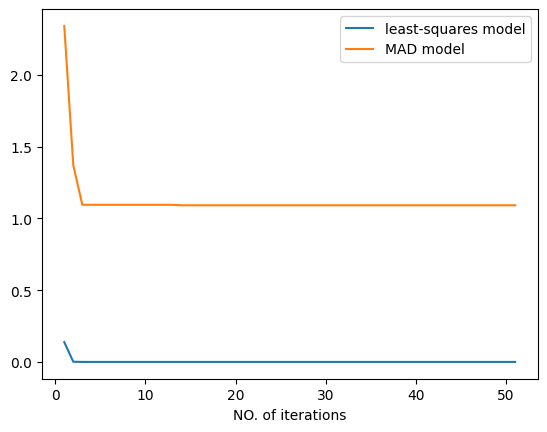

In [5]:
## Data for use in Q4

x4 = np.array([[-0.372180347],[-0.630104555],[-1.150723051],[0.933616921],[-0.831975033],
                [-1.656988490],[1.124082010],[-0.393019792],[-0.732695333],[0.452214528]])
y4 = np.array([[-1.174803460],[-1.856390758],[-2.256630546],[-9.994548305],[-1.710868702],
                [-2.682265692],[0.191515393],[-1.247013155],[-1.684018106],[-0.624466506]])
# Code provided for Q4
def model(x,w):
    a = w[0,:] + w[1,:]*x[0]
    return a
def least_squares(w):
    cost = 0
    for i in range(len(x4)):
        cost += (model(x4[i],w)-y4[i])**2
        return cost/float(np.size(y4))
# the next two lines find the optimal weights for the simple linear regression model using
w_init = np.array([[0,0]])
wh_MSE1,sh1_MSE1 = random_search(g=least_squares,alpha_choice='diminishing',max_its=50,w=w_init,num_samples=1000)
print('model parameters found using least squares:',wh_MSE1[-1])
## Enter code for part (a) below [3 marks]
def MAD(w):
    cost = 0
    for i in range(len(x4)):
        cost += (abs(y4[i] - model(x4[i],w)))
    return cost/float(np.size(x4))
## Enter code for part (b) below [2 marks]
wh_MSE2,sh1_MSE2 = random_search(g=MAD,alpha_choice='diminishing',max_its=50,w=w_init,num_samples=1000)
print('weights 𝑤0,𝑤1 that optimize the Mean Absolute Deviation for a simple linear regression model: ',wh_MSE2[-1])
## Enter code and comment for part (c) below [5 marks]
plt.plot(iterations, sh1_MSE1, label = "least-squares model")
plt.plot(iterations, sh1_MSE2, label = "MAD model")
plt.xlabel("NO. of iterations")
plt.legend()
plt.show()

The least squares approach limits the distance between a function and the data points that's why we got smaller values as compared to MAD model and whereas The mean absolute deviation of a dataset is the average distance between each data point and the mean. It gives us an idea about the variability in a dataset and therefore the datapoints in a dataset are more distinct to each other, we get larger values as shown in the plot as well.